In [1]:
using LinearAlgebra, Plots
DEV = true
if DEV    # use local package
    include("../src/EDKit.jl")
    using .EDKit
else      # use EDKit in the Pkg system
    using EDKit
end

## Free Fermion 

The Hamiltonian
$$
H = \frac{1}{4}\sum_j X_j Y_{j+1} - Y_j X_{j+1}
\simeq \frac{1}{2}\sum_j (i c_j^\dagger c_{j+1} - i c_{j+1}^\dagger c_j).
$$
Dispersion:
$$
E(k) = -\sin k.
$$

In [ ]:
L = 50
mat = (spin("XY") - spin("YX"))/4
Ek = zeros(L)
for k = 1:L
    B = TranslationalBasis(BigInt;L, k, N=1, small_N=true)
    H = trans_inv_operator(mat, 1:2, B) |> Array
    Ek[k] = real(H[1])
end

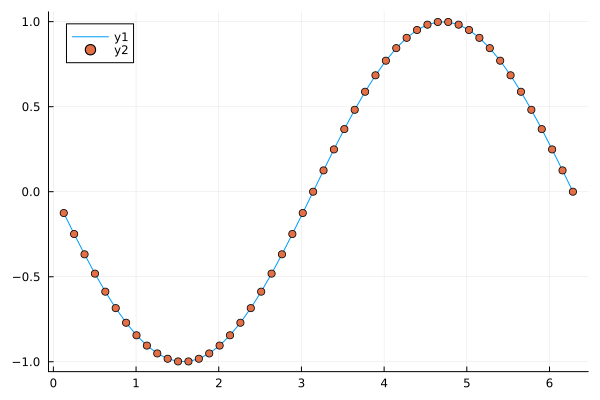

In [23]:
using Plots
k = 2π/L * (1:L)
plot(k, Ek)
scatter!(k, -sin.(k))